In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import sys
# !conda install --yes --prefix {sys.prefix} seaborn

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# Normilization and standardization
from sklearn import preprocessing

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Hyperparametering tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [2]:
#import data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Frequency')

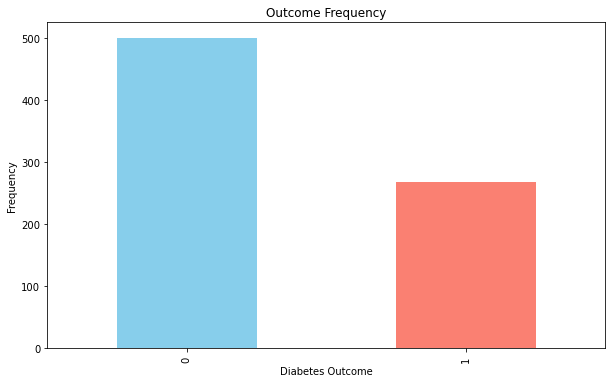

In [5]:
# plotting a chart for outcome
data.Outcome.value_counts().plot(kind="bar", figsize=(10,6), color=["skyblue","salmon"])

plt.title("Outcome Frequency")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Frequency")

<AxesSubplot:ylabel='Frequency'>

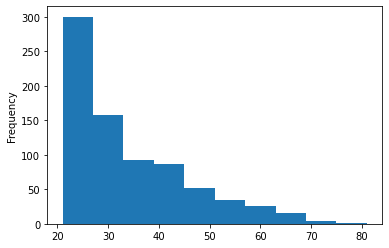

In [6]:
# age distribution plot
data.Age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

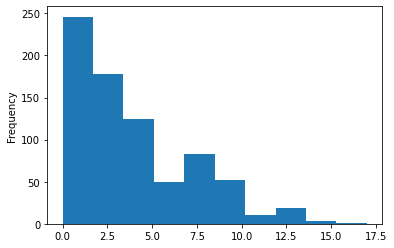

In [7]:
# Pregnancy distribution plots
data.Pregnancies.plot.hist()

In [8]:
pd.crosstab(data.Pregnancies, data.Outcome, dropna=False)

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


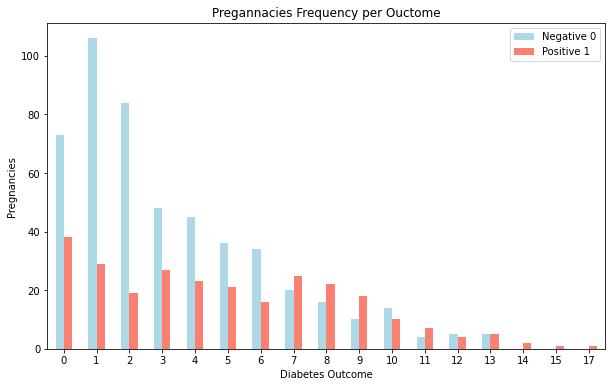

In [9]:
# Pregannacies Frequency per Ouctome
pd.crosstab(data.Pregnancies, data.Outcome, dropna=False).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Pregannacies Frequency per Ouctome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Pregnancies")
plt.legend(["Negative 0", "Positive 1"])
plt.xticks(rotation = 0);

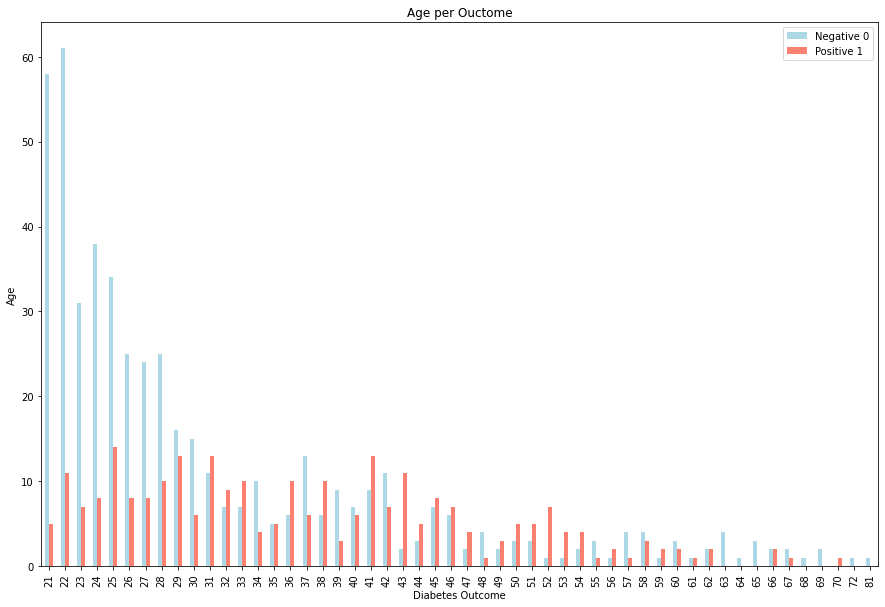

In [10]:
pd.crosstab(data.Age, data.Outcome, dropna=False).plot(kind="bar", 
                                   figsize=(15,10), 
                                   color=["lightblue", "salmon"])
# Add attributes to the plot to make it more readable
plt.title("Age per Ouctome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Age")
plt.legend(["Negative 0", "Positive 1"])

In [11]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[cols] = data[cols].replace({'0':np.nan, 0:np.nan})
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1


In [12]:
# # replace entries with missing values with mean values
# data['Glucose'].fillna( value=data['Glucose'].mean(), inplace=True)
# data['BloodPressure'].fillna(value=data['BloodPressure'].mean(), inplace=True )
# data['SkinThickness'].fillna(value=data['SkinThickness'].mean(), inplace=True )
# data['Insulin'].fillna(value=data['Insulin'].mean(), inplace=True )
# data['BMI'].fillna( value=data['BMI'].mean(), inplace=True)
# data['DiabetesPedigreeFunction'].fillna(value=data['DiabetesPedigreeFunction'].mean(), inplace=True )
# data['Age'].fillna(value=data['Age'].mean(), inplace=True )

In [13]:
# removing entries with missing values
data=data.dropna()

# reseting the index back to normal after enteries with missing values
data=data.reset_index(drop="True")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1
...,...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1
388,1,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1
389,2,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0
390,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0


In [14]:
# check our target values
data.Outcome.value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [15]:
# Find the correlation between our independent variables
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


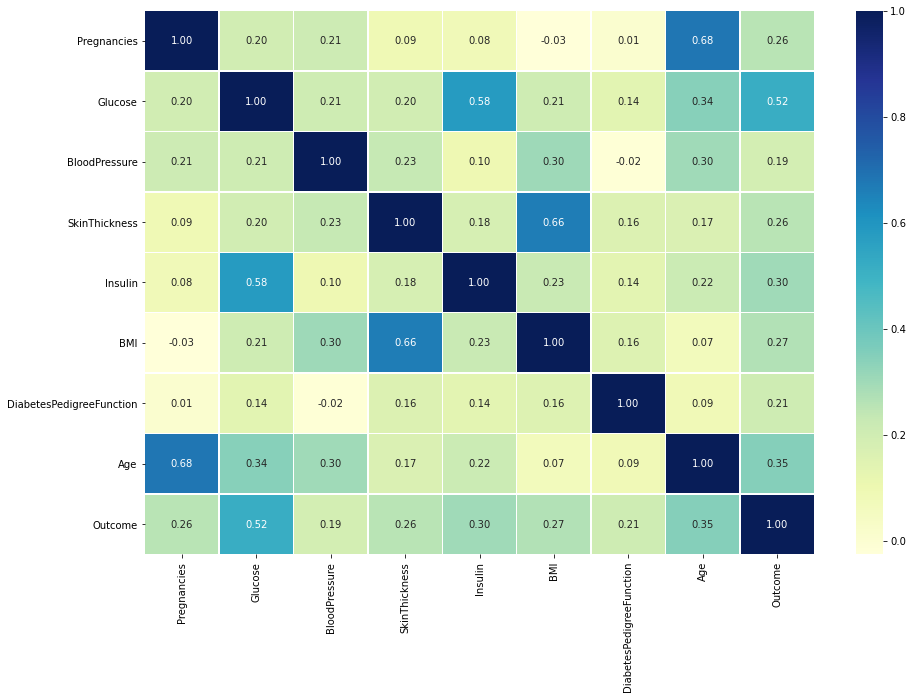

In [16]:
# plotting a correlation plot
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [17]:
# # normalize the data attributes
# normalized_x = preprocessing.normalize(data.drop("Outcome", axis=1))
# normalized_x

In [18]:
# # standardize the data attributes
# standardized_x = preprocessing.scale(data.drop("Outcome", axis=1))
# standardized_x

# 1. RandomForestClassifier



In [19]:
np.random.seed(12)

# Setting Data
x = data.drop("Outcome", axis=1)
y = data.Outcome

# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Random Forest Classifier
rf = RandomForestClassifier()

#Fitting Model
rf.fit(x_train, y_train)

# Evaluating the RandomForestClassifier
one=rf.score(x_test, y_test)
one

0.8227848101265823

In [20]:
# Model Evaluation 

y_preds = rf.predict(x_test)
y_preds

print(classification_report(y_test, y_preds))

print("Accuracy score: ",accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        56
           1       0.76      0.57      0.65        23

    accuracy                           0.82        79
   macro avg       0.80      0.75      0.77        79
weighted avg       0.82      0.82      0.81        79

Accuracy score:  0.8227848101265823


In [21]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,52,4
1,10,13


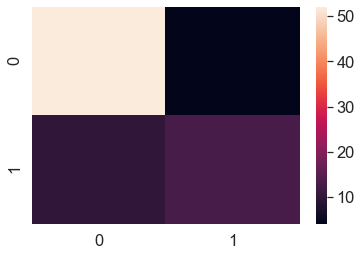

In [22]:
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

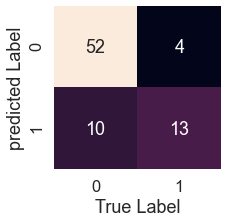

In [23]:
def plot_conf_mat(conf_mat):
    Fig, ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("predicted Label")
    
plot_conf_mat(conf_mat)

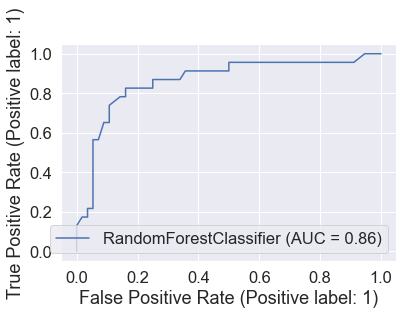

In [24]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rf, x_test, y_test);

In [25]:
# Cross validation
from sklearn.model_selection import cross_val_score
ww = cross_val_score(rf, x, y)

# Mean of cross validation
rf_cross_val_score = np.mean(ww)
print("Accuracy of Cross Validation: ", rf_cross_val_score)

# Cross-validated precision score
rf_cv_precision = np.mean(cross_val_score(rf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",rf_cv_precision )

# Cross-validated recall score
rf_cv_recall = np.mean(cross_val_score(rf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",rf_cv_recall )

# Cross-validated F1 score
rf_cv_f1 = np.mean(cross_val_score(rf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",rf_cv_f1 )

Accuracy of Cross Validation:  0.7909769555339177
Precision of Cross Validation:  0.7023919413919414
Recall of Cross Validation:  0.6153846153846154
Recall of Cross Validation:  0.6404615384615384


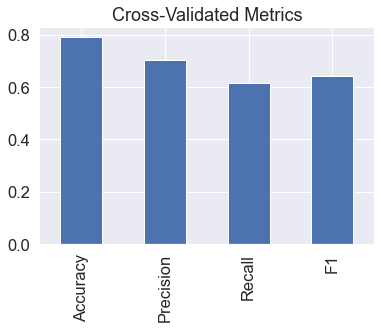

In [26]:
# Visualizing cross-validated metrics
rf_cv_metrics = pd.DataFrame({"Accuracy": rf_cross_val_score,
                            "Precision": rf_cv_precision,
                            "Recall": rf_cv_recall,
                            "F1": rf_cv_f1},
                          index=[0])
rf_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [27]:
# Tuning RandomForestClassifier model hyperparameters by hand.
np.random.seed(12)
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
estimators = range(10, 210, 10) # 10 to 200

# Setup algorithm
rf = RandomForestClassifier()

# Loop through different neighbors values
for i in estimators:
    rf.set_params(n_estimators = i) # set neighbors value
    
    # Fit the algorithm
    rf.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(rf.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(rf.score(x_test, y_test))

In [28]:
test_scores

[0.7974683544303798,
 0.8227848101265823,
 0.8227848101265823,
 0.8227848101265823,
 0.8607594936708861,
 0.810126582278481,
 0.8227848101265823,
 0.8227848101265823,
 0.810126582278481,
 0.8481012658227848,
 0.8354430379746836,
 0.8227848101265823,
 0.810126582278481,
 0.8481012658227848,
 0.8354430379746836,
 0.8354430379746836,
 0.8227848101265823,
 0.8227848101265823,
 0.8354430379746836,
 0.8354430379746836]

Maximum RandomForestClassifier score on the test data: 86.08%


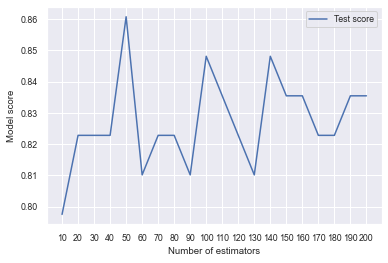

In [29]:
sns.set(font_scale=0.8)
plt.plot(estimators, test_scores, label="Test score")
plt.xticks(np.arange(10, 210, 10))
plt.xlabel("Number of estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum RandomForestClassifier score on the test data: {max(test_scores)*100:.2f}%")

In [30]:
## Tuning RandomForestClassifier hyperparameters using RandomizedSearchCV
# Different RandomForestClassifier hyperparameters
rf_randomcv = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_randomcv,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [32]:
# Evaluate the randomized search random forest model
uu = cross_val_score(rs_rf, x, y)

# Mean of cross validation
rs_rf_cross_val_score = np.mean(uu)
print("Accuracy of Cross Validation: ", rs_rf_cross_val_score)

# Cross-validated precision score
rs_rf_cv_precision = np.mean(cross_val_score(rs_rf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",rs_rf_cv_precision )

# Cross-validated recall score
rs_rf_cv_recall = np.mean(cross_val_score(rs_rf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",rs_rf_cv_recall )

# Cross-validated F1 score
rs_rf_cv_f1 = np.mean(cross_val_score(rs_rf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",rs_rf_cv_f1 )

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy of Cross Validation:  0.7859136643946769
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Precision of Cross Validation:  0.7353650793650793
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 

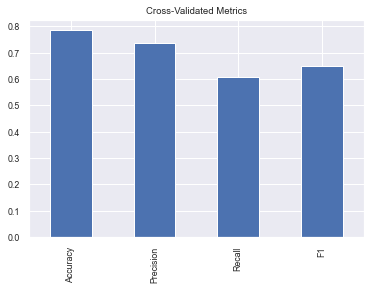

In [33]:
# Visualizing cross-validated metrics
rs_rf_cv_metrics = pd.DataFrame({"Accuracy": rs_rf_cross_val_score,
                            "Precision": rs_rf_cv_precision,
                            "Recall": rs_rf_cv_recall,
                            "F1": rs_rf_cv_f1},
                          index=[0])
rs_rf_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [34]:
# Tuning RandomForestClassifier hyperparameters using GridSearchCv
# Different RandomForestClassifier hyperparameters
rf_gridcv = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(estimator = RandomForestClassifier() , param_grid = rf_gridcv, 
                           n_jobs = -1, verbose = 2)

# Fit grid hyperparameter search model
gs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [35]:
# Check the best parameters
gs_rf.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [36]:
# Evaluate the model
ii = cross_val_score(gs_rf, x, y)

# Mean of cross validation
gs_rf_cross_val_score = np.mean(ii)
print("Accuracy of Cross Validation: ", gs_rf_cross_val_score)

# Cross-validated precision score
gs_rf_cv_precision = np.mean(cross_val_score(gs_rf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",gs_rf_cv_precision )

# Cross-validated recall score
gs_rf_cv_recall = np.mean(cross_val_score(gs_rf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",gs_rf_cv_recall )

# Cross-validated F1 score
gs_rf_cv_f1 = np.mean(cross_val_score(gs_rf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",gs_rf_cv_f1 )

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy of Cross Validation:  0.7731580655631287
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Precision of Cross Validation:  0.7433786696395392
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Fit

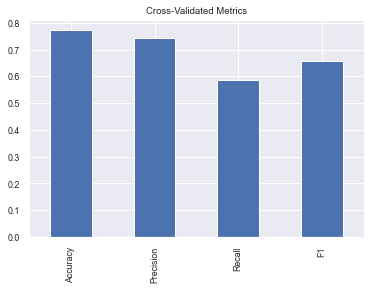

In [37]:
# Visualizing cross-validated metrics
gs_rf_cv_metrics = pd.DataFrame({"Accuracy": gs_rf_cross_val_score,
                            "Precision": gs_rf_cv_precision,
                            "Recall": gs_rf_cv_recall,
                            "F1": gs_rf_cv_f1},
                          index=[0])
gs_rf_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 2. LinearSVC

In [38]:
np.random.seed(12)

# Setting Data
x1 = x
y1 = y

# split data

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2)

# linearSVC

svc = LinearSVC(max_iter=1000000)
svc.fit(x1_train, y1_train)

# Evaluating the LinearSVC
two=svc.score(x1_test, y1_test)
two

/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.810126582278481

In [39]:
np.random.seed(12)

In [40]:
# Model Evaluation 
y1_preds = svc.predict(x1_test)
y1_preds

print(classification_report(y1_test, y1_preds))

print("Accuracy score: ",accuracy_score(y1_test, y1_preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        56
           1       0.75      0.52      0.62        23

    accuracy                           0.81        79
   macro avg       0.79      0.73      0.74        79
weighted avg       0.80      0.81      0.80        79

Accuracy score:  0.810126582278481


In [41]:
pd.crosstab(y1_test, y1_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,52,4
1,11,12


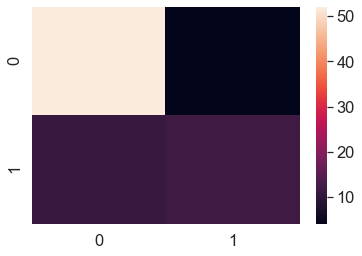

In [42]:
sns.set(font_scale=1.5)

conf_mat1 = confusion_matrix(y1_test, y1_preds)

sns.heatmap(conf_mat1);

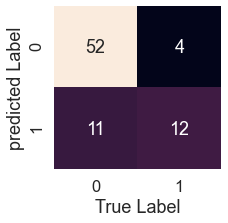

In [43]:
plot_conf_mat(conf_mat1)

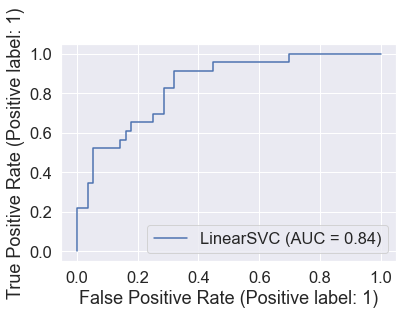

In [44]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(svc, x1_test, y1_test);

In [45]:
# Cross validation
from sklearn.model_selection import cross_val_score
qq = cross_val_score(svc, x1, y1)

# Mean of cross validation
svc_cross_val_score = np.mean(qq)
print("Mean of Cross Validation: ", svc_cross_val_score)

# Cross-validated precision score
svc_cv_precision = np.mean(cross_val_score(svc,
                                       x1,
                                       y1,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",svc_cv_precision )

# Cross-validated recall score
svc_cv_recall = np.mean(cross_val_score(svc,
                                    x1,
                                    y1,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",svc_cv_recall )

# Cross-validated F1 score
svc_cv_f1 = np.mean(cross_val_score(svc,
                                x1,
                                y1,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",svc_cv_f1 )

/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.war

Mean of Cross Validation:  0.7909444985394353


/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.war

Precision of Cross Validation:  0.7374891774891775


/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.war

Recall of Cross Validation:  0.5461538461538462


/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.war

Recall of Cross Validation:  0.6226950354609928


/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


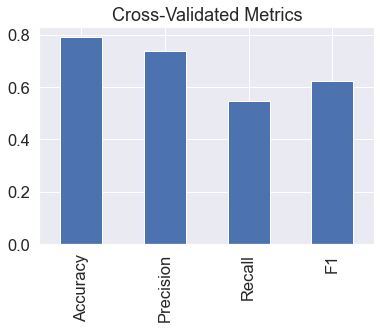

In [46]:
# Visualizing cross-validated metrics
svc_cv_metrics = pd.DataFrame({"Accuracy": svc_cross_val_score,
                            "Precision": svc_cv_precision,
                            "Recall": svc_cv_recall,
                            "F1": svc_cv_f1},
                          index=[0])
svc_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 3. LogisticRegression

In [47]:
np.random.seed(12)

# Setting Data
x2 = x
y2 = y

# split data

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2)

#LogisticRegression 

lr = LogisticRegression()
lr.fit(x2_train, y2_train)

# Evaluating the LogisticRegression
three=lr.score(x2_test, y2_test)
three

/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7468354430379747

In [48]:
# Model Evaluation 
y2_preds = lr.predict(x2_test)
y2_preds

print(classification_report(y2_test, y2_preds))

print("Accuracy score: ",accuracy_score(y2_test, y2_preds))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        56
           1       0.60      0.39      0.47        23

    accuracy                           0.75        79
   macro avg       0.69      0.64      0.65        79
weighted avg       0.73      0.75      0.73        79

Accuracy score:  0.7468354430379747


In [49]:
pd.crosstab(y2_test, y2_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,50,6
1,14,9


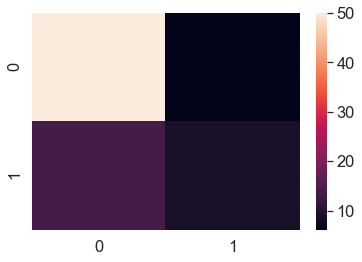

In [50]:
sns.set(font_scale=1.5)

conf_mat2 = confusion_matrix(y2_test, y2_preds)

sns.heatmap(conf_mat2);

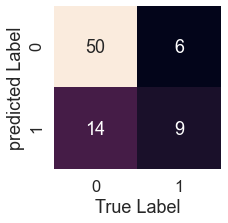

In [51]:
plot_conf_mat(conf_mat2)

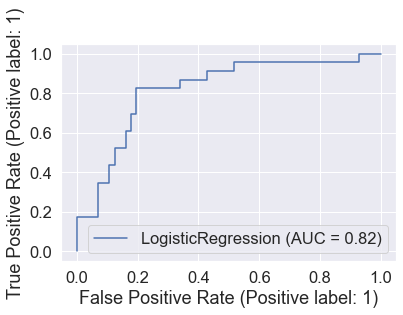

In [52]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(lr, x2_test, y2_test);

In [53]:
# Cross validation
from sklearn.model_selection import cross_val_score
ee = cross_val_score(lr, x2, y2)

# Mean of cross validation
lr_cross_val_score = np.mean(ee)
print("Mean of Cross Validation: ", lr_cross_val_score)

# Cross-validated precision score
lr_cv_precision = np.mean(cross_val_score(lr,
                                       x2,
                                       y2,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",lr_cv_precision )

# Cross-validated recall score
lr_cv_recall = np.mean(cross_val_score(lr,
                                    x2,
                                    y2,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",lr_cv_recall )

# Cross-validated F1 score
lr_cv_f1 = np.mean(cross_val_score(lr,
                                x2,
                                y2,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",lr_cv_f1 )

/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

Mean of Cross Validation:  0.7756572541382668
Precision of Cross Validation:  0.703595238095238
Recall of Cross Validation:  0.5615384615384615
Recall of Cross Validation:  0.6217414625424638


/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ahmadtambaya/Documents/projects/machinelearning/demo/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

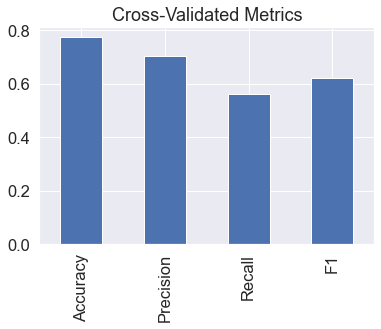

In [54]:
# Visualizing cross-validated metrics
lr_cv_metrics = pd.DataFrame({"Accuracy": lr_cross_val_score,
                            "Precision": lr_cv_precision,
                            "Recall": lr_cv_recall,
                            "F1": lr_cv_f1},
                          index=[0])
lr_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [55]:
# Tuning LogisticRegression hyperparameters using RandomizedSearchCV

# Different LogisticRegression hyperparameters
lr_randomcv = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_randomcv,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_lr.fit(x2_train, y2_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [56]:
# rs_lr.best_params_

In [57]:
# Evaluate the randomized search random forest model
pp = cross_val_score(rs_lr, x2, y2)

# Mean of cross validation
rs_lr_cross_val_score = np.mean(pp)
print("Accuracy of Cross Validation: ", rs_lr_cross_val_score)

# Cross-validated precision score
rs_lr_cv_precision = np.mean(cross_val_score(rs_lr,
                                       x2,
                                       y2,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",rs_lr_cv_precision )

# Cross-validated recall score
rs_lr_cv_recall = np.mean(cross_val_score(rs_lr,
                                    x2,
                                    y2,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",rs_lr_cv_recall )

# Cross-validated F1 score
rs_lr_cv_f1 = np.mean(cross_val_score(rs_lr,
                                x2,
                                y2,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",rs_lr_cv_f1 )

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy of Cross Validation:  0.7858162934112302
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Precision of Cross Validation:  0.7303745529832486
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 

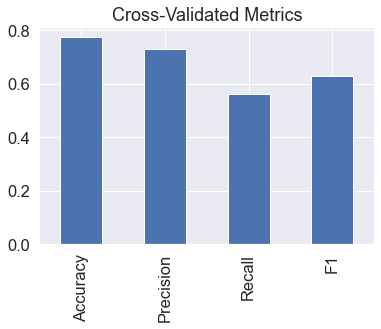

In [58]:
# Visualizing cross-validated metrics
rs_lr_cv_metrics = pd.DataFrame({"Accuracy": lr_cross_val_score,
                            "Precision": rs_lr_cv_precision,
                            "Recall": rs_lr_cv_recall,
                            "F1": rs_lr_cv_f1},
                          index=[0])
rs_lr_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [59]:
# Tuning LogisticRegression hyperparameters using GridSearchCV
# Different LogisticRegression hyperparameters
lr_gridcv = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                          param_grid=lr_gridcv,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr.fit(x2_train, y2_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [60]:
# Check the best parameters
gs_lr.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [61]:
# Evaluate the GridSearchCV random forest model
ll = cross_val_score(gs_lr, x2, y2)

# Mean of cross validation
gs_lr_cross_val_score = np.mean(ll)
print("Accuracy of Cross Validation: ", gs_lr_cross_val_score)

# Cross-validated precision score
gs_lr_cv_precision = np.mean(cross_val_score(gs_lr,
                                       x2,
                                       y2,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",gs_lr_cv_precision )

# Cross-validated recall score
gs_lr_cv_recall = np.mean(cross_val_score(gs_lr,
                                    x2,
                                    y2,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",gs_lr_cv_recall )

# Cross-validated F1 score
gs_lr_cv_f1 = np.mean(cross_val_score(gs_lr,
                                x2,
                                y2,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",gs_lr_cv_f1 )

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy of Cross Validation:  0.7858162934112302
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Precision of Cross Validation:  0.7303745529832486
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 

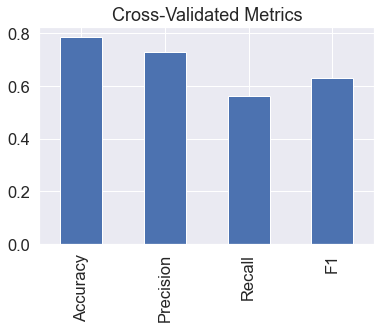

In [62]:
# Visualizing cross-validated metrics
gs_lr_cv_metrics = pd.DataFrame({"Accuracy": gs_lr_cross_val_score,
                            "Precision": gs_lr_cv_precision,
                            "Recall": gs_lr_cv_recall,
                            "F1": gs_lr_cv_f1},
                          index=[0])
gs_lr_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 4. Support Vector Machines

In [63]:
np.random.seed(12)

# Setting Data
x3 = x
y3 = y

# split data

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.2)

#NearestNeighbors 

svm = svm.SVC()
svm.fit(x3_train, y3_train)

# Evaluating the NearestNeighbors
four=svm.score(x3_test, y3_test)
four

0.8227848101265823

In [64]:
# Model Evaluation 
y3_preds = svm.predict(x3_test)
y3_preds

print(classification_report(y3_test, y3_preds))

print("Accuracy score: ",accuracy_score(y3_test, y3_preds))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        56
           1       0.80      0.52      0.63        23

    accuracy                           0.82        79
   macro avg       0.81      0.73      0.76        79
weighted avg       0.82      0.82      0.81        79

Accuracy score:  0.8227848101265823


In [65]:
pd.crosstab(y3_test, y3_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,53,3
1,11,12


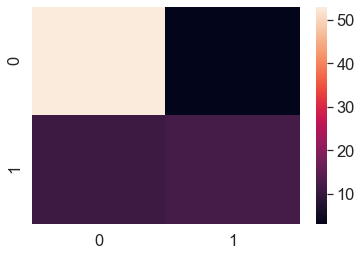

In [66]:
sns.set(font_scale=1.5)

conf_mat3 = confusion_matrix(y3_test, y3_preds)

sns.heatmap(conf_mat3);

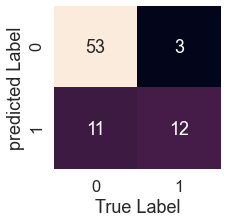

In [67]:
plot_conf_mat(conf_mat3)

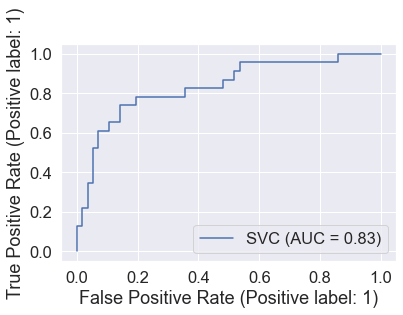

In [68]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(svm, x3_test, y3_test);

In [69]:
# Cross validation
from sklearn.model_selection import cross_val_score
rr = cross_val_score(svm, x3, y3)

# Mean of cross validation
svm_cross_val_score = np.mean(rr)
print("Mean of Cross Validation: ", svm_cross_val_score)

# Cross-validated precision score
svm_cv_precision = np.mean(cross_val_score(svm,
                                       x3,
                                       y3,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",svm_cv_precision )

# Cross-validated recall score
svm_cv_recall = np.mean(cross_val_score(svm,
                                    x3,
                                    y3,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",svm_cv_recall )

# Cross-validated F1 score
svm_cv_f1 = np.mean(cross_val_score(svm,
                                x3,
                                y3,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",svm_cv_f1 )

Mean of Cross Validation:  0.7731580655631288
Precision of Cross Validation:  0.7610990712074304
Recall of Cross Validation:  0.4769230769230769
Recall of Cross Validation:  0.5733314829133541


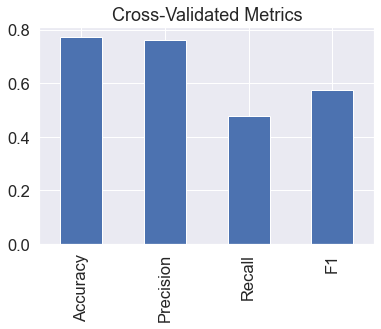

In [70]:
# Visualizing cross-validated metrics
svm_cv_metrics = pd.DataFrame({"Accuracy": svm_cross_val_score,
                            "Precision": svm_cv_precision,
                            "Recall": svm_cv_recall,
                            "F1": svm_cv_f1},
                          index=[0])
svm_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 5. KNeighborsClassifier

In [71]:
np.random.seed(12)

# Setting Data
x4 = x
y4 = y

# split data

x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, test_size=0.2)

#NearestNeighbors 

knn = KNeighborsClassifier()
knn.fit(x4_train, y4_train)

# Evaluating the NearestNeighbors
five=knn.score(x4_test, y4_test)
five

0.759493670886076

In [72]:
# Model Evaluation 
y4_preds = knn.predict(x4_test)
y4_preds

print(classification_report(y4_test, y4_preds))

print("Accuracy score: ",accuracy_score(y4_test, y4_preds))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        56
           1       0.61      0.48      0.54        23

    accuracy                           0.76        79
   macro avg       0.71      0.68      0.69        79
weighted avg       0.75      0.76      0.75        79

Accuracy score:  0.759493670886076


In [73]:
pd.crosstab(y4_test, y4_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,49,7
1,12,11


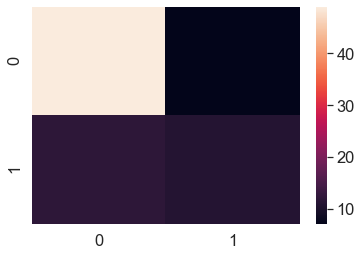

In [74]:
sns.set(font_scale=1.5)

conf_mat4 = confusion_matrix(y4_test, y4_preds)

sns.heatmap(conf_mat4);

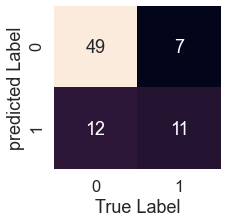

In [75]:
plot_conf_mat(conf_mat4)

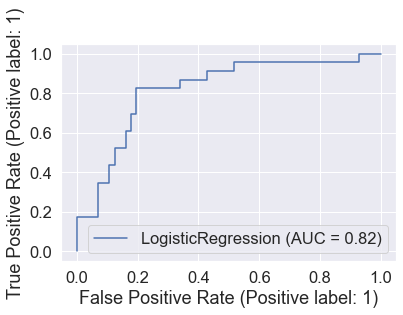

In [76]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(lr, x4_test, y4_test);

In [77]:
# Cross validation
from sklearn.model_selection import cross_val_score
tt = cross_val_score(knn, x4, y4)

# Mean of cross validation
knn_cross_val_score = np.mean(tt)
print("Mean of Cross Validation: ", knn_cross_val_score)


# Cross-validated precision score
knn_cv_precision = np.mean(cross_val_score(knn,
                                       x4,
                                       y4,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

print("Precision of Cross Validation: ",knn_cv_precision )

# Cross-validated recall score
knn_cv_recall = np.mean(cross_val_score(knn,
                                    x4,
                                    y4,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

print("Recall of Cross Validation: ",knn_cv_recall )

# Cross-validated F1 score
knn_cv_f1 = np.mean(cross_val_score(knn,
                                x4,
                                y4,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

print("Recall of Cross Validation: ",knn_cv_f1 )

Mean of Cross Validation:  0.7143459915611815
Precision of Cross Validation:  0.5833345720302242
Recall of Cross Validation:  0.49230769230769234
Recall of Cross Validation:  0.5264054388083246


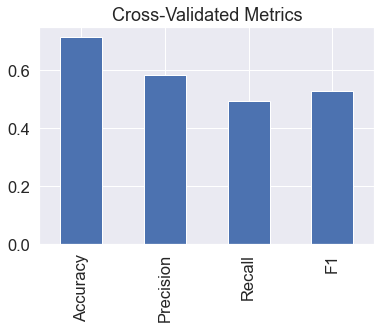

In [78]:
# Visualizing cross-validated metrics
knn_cv_metrics = pd.DataFrame({"Accuracy": knn_cross_val_score,
                            "Precision": knn_cv_precision,
                            "Recall": knn_cv_recall,
                            "F1": knn_cv_f1},
                          index=[0])
knn_cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [79]:
# Tuning KNN model hyperparameters by hand.
# Create a list of train scores
train_scores4 = []

# Create a list of test scores
test_scores4 = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x4_train, y4_train)
    
    # Update the training scores
    train_scores4.append(knn.score(x4_train, y4_train))
    
    # Update the test scores
    test_scores4.append(knn.score(x4_test, y4_test))

In [80]:
test_scores4

[0.7721518987341772,
 0.7721518987341772,
 0.759493670886076,
 0.7721518987341772,
 0.759493670886076,
 0.7721518987341772,
 0.7974683544303798,
 0.7974683544303798,
 0.810126582278481,
 0.810126582278481,
 0.7848101265822784,
 0.7974683544303798,
 0.7848101265822784,
 0.810126582278481,
 0.7848101265822784,
 0.7974683544303798,
 0.7848101265822784,
 0.810126582278481,
 0.8227848101265823,
 0.7974683544303798]

Maximum KNN score on the test data: 82.28%


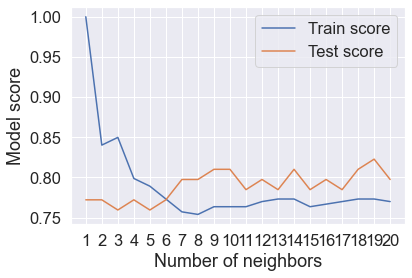

In [81]:
plt.plot(neighbors, train_scores4, label="Train score")
plt.plot(neighbors, test_scores4, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores4)*100:.2f}%")

# Comparing Models

In [82]:
model_score=[one,two,three,four,five]
model_score = pd.Series(model_score,index=['RandomForestClassifier','LinearSVC','Logistic Regression','SVM','KNN'])
model_score

RandomForestClassifier    0.822785
LinearSVC                 0.810127
Logistic Regression       0.746835
SVM                       0.822785
KNN                       0.759494
dtype: float64

Text(0, 0.5, 'Accuracy ')

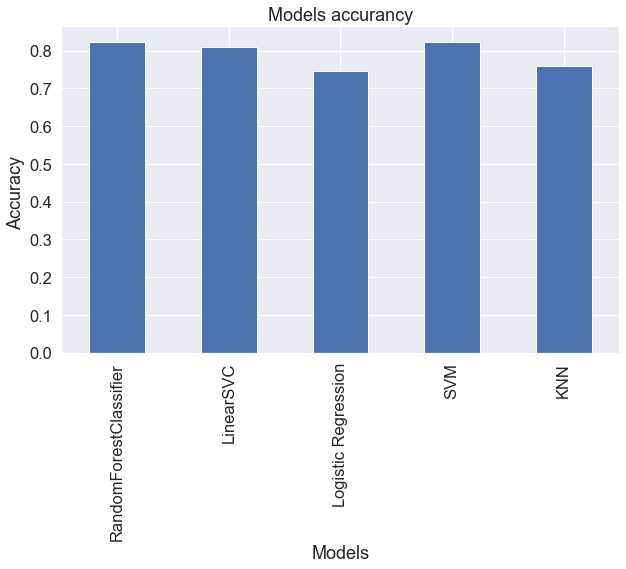

In [83]:
model_score.plot(kind="bar", figsize=(10,6))


# Add attributes to the plot to make it more readable
plt.title("Models accurancy")
plt.xlabel("Models")
plt.ylabel("Accuracy ")